# Calculate the observed amplitudes with data.

Define constants

In [4]:
from math import sqrt, radians, atan2, atan, tan, degrees
from IPython.display import Latex
import numpy as np
font_size=14
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os, sys
sys.path.append('../CommonUtils/')
import CommonUtils as cu

In [5]:
a_edm = 0.089
print("Using asymmetry factor of", a_edm)

Using asymmetry factor of 0.089


$$ \delta ' = \tan\left(\frac{B_z}{B_y}\right)  \approx \frac{B_z}{B_y}$$

In [10]:
A_bz_mean = 1.4
A_bz_mean_e = 3.3
print("For A_bz of", A_bz_mean, "+-",A_bz_mean_e ,"urad")

delta_lab = A_bz_mean / a_edm
delta_lab_e = A_bz_mean_e / a_edm

print("Tilt angle in the lab frame", delta_lab, "+-" ,delta_lab_e, "urad or ppm")
print("Tilt angle in the lab frame", round(delta_lab,1), "+-" , round(delta_lab_e,1), "urad or ppm")
print("Tilt angle in the lab frame", round(delta_lab,0), "+-" , round(delta_lab_e,0), "urad or ppm")
print("Using asymmetry factor of", a_edm)

For A_bz of 1.4 +- 3.3 urad
Tilt angle in the lab frame 15.730337078651685 +- 37.07865168539326 urad or ppm
Tilt angle in the lab frame 15.7 +- 37.1 urad or ppm
Tilt angle in the lab frame 16.0 +- 37.0 urad or ppm
Using asymmetry factor of 0.089


$$ \frac{\Delta \omega_a}{\omega_a} = \frac{1}{2}\left(\frac{(1+a_{\mu})}{a_{\mu}\gamma}\frac{B_z}{B_y}\right)^2 $$

In [11]:
aMuon= 11659208.9e-10  
betaGammaMagicSquared = (1.0 / aMuon)
gammaMagicSquared = (1.0 + betaGammaMagicSquared)
gammaMagic=sqrt(gammaMagicSquared)
print("ɣ"+"={0:.5f}".format(gammaMagic))

ɣ=29.30343


In [12]:
def func_omega(delta):
    delta = delta*1e-6 # input in ppm
    corr = 0.5 * ( ( (1+aMuon)/(aMuon*gammaMagic) ) * delta )**2
    return corr*1e+6 # output in ppm

In [13]:
delta_omega = func_omega(delta_lab)
delta_omega_e = func_omega(delta_lab_e)

print("For tilt of", delta_lab, "ppm")

print("Omega_a uncertainty", delta_omega, "+-" ,delta_omega_e, "ppm")
print("Omega_a uncertainty", delta_omega*1e3, "+-" ,delta_omega_e*1e3, "ppb")
print("Omega_a uncertainty", round(delta_omega,1), "+-" , round(delta_omega_e,1), "ppm")

#calculate the asymmetric errors 
delta_omega_e_P = func_omega( (delta_lab+delta_lab_e) )
delta_omega_e_M = func_omega( (delta_lab-delta_lab_e) )

print("Omega_a uncertainty", round(delta_omega,2), "+" , round(delta_omega_e_P-delta_omega,2),"-",round(delta_omega-delta_omega_e_M,2),  "ppm")
print("Omega_a uncertainty", round(delta_omega*1e3,1), "+" , round( (delta_omega_e_P-delta_omega)*1e3,1), "-",round( (delta_omega-delta_omega_e_M)*1e3,1),  "ppb")


For tilt of 15.730337078651685 ppm
Omega_a uncertainty 0.1062387706935765 +- 0.5902756188025755 ppm
Omega_a uncertainty 106.2387706935765 +- 590.2756188025755 ppb
Omega_a uncertainty 0.1 +- 0.6 ppm
Omega_a uncertainty 0.11 + 1.09 - -0.09 ppm
Omega_a uncertainty 106.2 + 1091.1 - -89.4 ppb


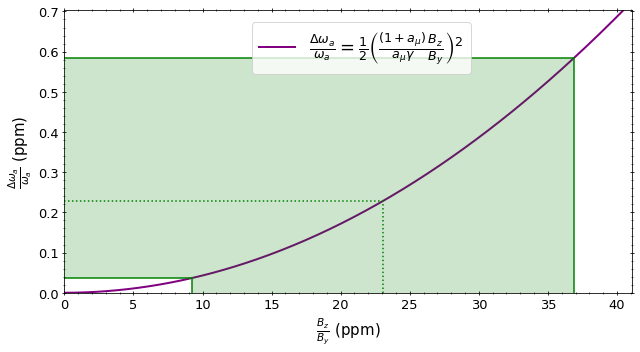

In [27]:
delta_test = np.linspace(0, delta_lab+delta_lab_e*1.5, 400)
fig, ax = cu.plot(delta_test, func_omega(delta_test), figsize=(9,5), plot=True, lw=2, ls="-", c="purple", label=r"$ \frac{\Delta \omega_a}{\omega_a} = \frac{1}{2}\left(\frac{(1+a_{\mu})}{a_{\mu}\gamma}\frac{B_z}{B_y}\right)^2$")
ax.set_xlabel(r"$\frac{B_z}{B_y}$ (ppm)", fontsize=15)
ax.set_ylabel(r"$\frac{\Delta \omega_a}{\omega_a}$ (ppm)", fontsize=15)
ax.set_xlim(0, delta_lab+delta_lab_e*1.3)
ax.set_ylim(0, delta_omega_e_P*1.2)

ax.plot([delta_lab,delta_lab],[0, delta_omega], ls=":", c="g", zorder=1)
ax.plot([delta_lab-delta_lab_e,delta_lab-delta_lab_e],[0, delta_omega_e_M], ls="-", c="g", zorder=1)
ax.plot([delta_lab+delta_lab_e,delta_lab+delta_lab_e],[0, delta_omega_e_P], ls="-", c="g", zorder=1)

ax.plot([0,delta_lab],[delta_omega, delta_omega], ls=":", c="g", zorder=1)
ax.plot([0,delta_lab+delta_lab_e],[delta_omega_e_P, delta_omega_e_P], ls="-", c="g", zorder=1)
ax.plot([0,delta_lab-delta_lab_e],[delta_omega_e_M, delta_omega_e_M], ls="-", c="g", zorder=1)

ax.add_patch(patches.Rectangle(
        xy=(0, delta_omega_e_M),  # point of origin.
        width=delta_lab+delta_lab_e,
        height=delta_omega_e_P-delta_omega_e_M,
        linewidth=0,
        color='green',
        fill=True,
        alpha=0.2,
        zorder=3
    )
)

ax.add_patch(patches.Rectangle(
        xy=(delta_lab-delta_lab_e, 0),  # point of origin.
        width=delta_lab_e*2,
        height=delta_omega_e_M,
        linewidth=0,
        color='green',
        fill=True,
        alpha=0.2,
        zorder=3
    )
)

ax.legend(fontsize=18, loc=(0.33, 0.775))
fig.tight_layout()
plt.savefig("../fig/bz_money.png", dpi=200)